In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def apply_test(data_name, data):
    dist_names = ["norm", "gamma", "beta", "expon", "t", "chi2"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(scipy.stats, dist_name)  # 분포의 특징을 가져와서
        param = dist.fit(data) # 관측값을 이용하여 가정한 분포의 모수를 추정 
        params[dist_name] = param # 추정한 모수를 Dictionary에 넣고
        Stat, p = scipy.stats.kstest(data, dist_name, param) # Kolmogorov-Smirnov 검정을 합니다. 
        dist_results.append((dist_name, p)) # 결과를 list에 넣고요
    
    print(data_name + "의 확률검정")
    print(dist_results) # 각 분포의 p value를 한 번 보고요. 
    best_dist, best_p = (max(dist_results, key=lambda item: item[1])) # 그중에 제일 p값이 큰 것을 찾고요
    print("제일 비슷한 분포: %s"%(best_dist))
    print("그 분포의 p_value: %f"%(best_p))
    return best_dist, best_p, params[best_dist]

In [3]:
data = pd.read_excel("data\\5511_탄사람비율_시간대별 구분_최종.xlsx")
whole_data = []
for i in range(10):
    print(apply_test(data.iloc[i, 0], data.iloc[i, 1:][data.iloc[i, 1:].notna()].astype("float64"))[2], '\n')
    whole_data.extend(data.iloc[i, 1:][data.iloc[i, 1:].notna()].astype("float64"))

print(apply_test("전체 데이터의 분포", whole_data), '\n')
print(apply_test("1 - 데이터의 분포", list(map(lambda x: 1 - x, whole_data))), '\n')
print(apply_test("1 아닌 데이터의 분포", list(filter(lambda x: x < 1, whole_data))), '\n')
print(apply_test("1 - 1 아닌 데이터의 분포", list(map(lambda x: 1 - x, list(filter(lambda x: x < 1, whole_data))))), '\n')

시간대0의 확률검정
[('norm', 0.3907658621232146), ('gamma', 0.4201262815664272), ('beta', 0.022591313211638653), ('expon', 0.28257145422441055), ('t', 0.3908123074541989), ('chi2', 0.14885856254568364)]
제일 비슷한 분포: gamma
그 분포의 p_value: 0.420126
(346.08455321848874, -3.5359204500772776, 0.012559961778019262) 



C:\Users\rrhhk\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


시간대1의 확률검정
[('norm', 0.2592193678990472), ('gamma', 0.20949993492847263), ('beta', 0.17463526342539915), ('expon', 0.02560608809277798), ('t', 0.023013726606057938), ('chi2', 0.24353756064566345)]
제일 비슷한 분포: norm
그 분포의 p_value: 0.259219
(0.829375, 0.30718020577414235) 

시간대2의 확률검정
[('norm', 0.8087004768209767), ('gamma', 0.2310153135023556), ('beta', 0.45322046741126365), ('expon', 0.7853481724688752), ('t', 0.8087726279067001), ('chi2', 0.0011108085112365824)]
제일 비슷한 분포: t
그 분포의 p_value: 0.808773
(7347376.22191485, 0.9007288565261925, 0.0693921890903089) 



C:\Users\rrhhk\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\rrhhk\AppData\Roaming\Python\Python310\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


시간대3의 확률검정
[('norm', 0.4593234924784555), ('gamma', 0.11282302793745824), ('beta', 0.010891251259555278), ('expon', 0.08554501470026699), ('t', 0.03839174153626465), ('chi2', 0.029896580520425937)]
제일 비슷한 분포: norm
그 분포의 p_value: 0.459323
(0.9165266106442578, 0.1360202861868794) 



C:\Users\rrhhk\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


시간대4의 확률검정
[('norm', 0.17412502628669047), ('gamma', 0.15176694078339947), ('beta', 0.02657376558194524), ('expon', 0.0751929011319854), ('t', 0.023016520973951904), ('chi2', 0.13491034969571847)]
제일 비슷한 분포: norm
그 분포의 p_value: 0.174125
(0.8570541300804458, 0.21756447276636642) 



C:\Users\rrhhk\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


시간대5의 확률검정
[('norm', 0.6133713611076794), ('gamma', 0.5131945684147916), ('beta', 0.21598988744172132), ('expon', 0.02898267158268275), ('t', 0.769962836877297), ('chi2', 0.5142645575998668)]
제일 비슷한 분포: t
그 분포의 p_value: 0.769963
(2.0526539731766746, 0.8496108784358498, 0.14704890882509103) 



C:\Users\rrhhk\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


시간대6의 확률검정
[('norm', 0.47870577614346865), ('gamma', 0.4867143826280035), ('beta', 0.023133119743192987), ('expon', 0.15515678597100835), ('t', 0.02259063720703125), ('chi2', 0.43614913382111464)]
제일 비슷한 분포: gamma
그 분포의 p_value: 0.486714
(340.0123339871975, -5.23758910398157, 0.01771647941513539) 

시간대7의 확률검정
[('norm', 0.13821988257816464), ('gamma', 0.11516418331776368), ('beta', 0.21557667554428495), ('expon', 0.042090031223878666), ('t', 0.5048073716888262), ('chi2', 0.1341902110751212)]
제일 비슷한 분포: t
그 분포의 p_value: 0.504807
(0.8482015052710346, 0.9557393452897842, 0.043471712056047454) 



C:\Users\rrhhk\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\rrhhk\AppData\Roaming\Python\Python310\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


시간대8의 확률검정
[('norm', 0.2692418712073138), ('gamma', 0.24889916340033835), ('beta', 0.2713967448144856), ('expon', 0.17850474163672314), ('t', 0.26925946341180695), ('chi2', 0.32869780432100915)]
제일 비슷한 분포: chi2
그 분포의 p_value: 0.328698
(1.2021078608113838, 0.3749999999999999, 0.4360658242873984) 

시간대9의 확률검정
[('norm', 0.5463342604804022), ('gamma', 0.5446744208684839), ('beta', 0.06558985796611272), ('expon', 0.5107022215506525), ('t', 0.5463284417070857), ('chi2', 0.09280365701263693)]
제일 비슷한 분포: norm
그 분포의 p_value: 0.546334
(0.6851851851851851, 0.3708330443426071) 



C:\Users\rrhhk\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


전체 데이터의 분포의 확률검정
[('norm', 0.00010628060966123456), ('gamma', 6.103572987971892e-05), ('beta', 1.9132937168142209e-13), ('expon', 2.1325586502703385e-10), ('t', 2.0681689426999073e-26), ('chi2', 0.00014716271171592832)]
제일 비슷한 분포: chi2
그 분포의 p_value: 0.000147
('chi2', 0.00014716271171592832, (603.1234628491404, -4.133938639177112, 0.008182739037543518)) 

1 - 데이터의 분포의 확률검정
[('norm', 0.00010628060966123547), ('gamma', 1.892455546366017e-13), ('beta', 1.8924555437369117e-13), ('expon', 1.8924555434230458e-13), ('t', 2.3783642780566985e-30), ('chi2', 1.8924572263174675e-13)]
제일 비슷한 분포: norm
그 분포의 p_value: 0.000106
('norm', 0.00010628060966123547, (0.18677623518748923, 0.2682342731233017)) 

1 아닌 데이터의 분포의 확률검정
[('norm', 0.0861820102227765), ('gamma', 0.07863367773150354), ('beta', 0.03869821274269947), ('expon', 3.2297811755126015e-05), ('t', 0.06183367656500349), ('chi2', 0.0678886757974072)]
제일 비슷한 분포: norm
그 분포의 p_value: 0.086182
('norm', 0.0861820102227765, (0.6781090414853908, 0.28373

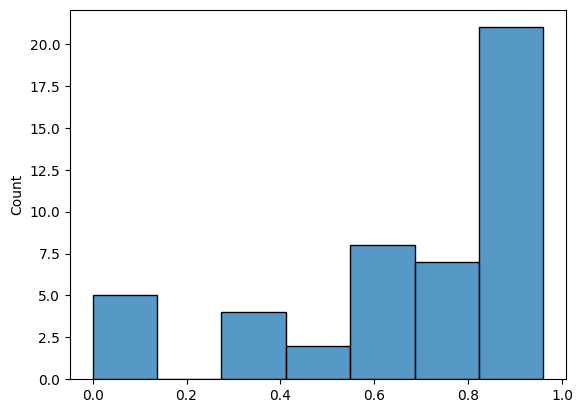

In [4]:
def draw(data):
    plt.figure()
    # sns.kdeplot(data)
    sns.histplot(data)

draw(list(filter(lambda x: x < 1, whole_data)))

In [5]:
bef_data = [[5, 3], [5, 2], [5, 2], [5, 2]]
aft_data = [[5, 2, 8], [5, 2, 22], [5, 3, 37]]

first_data = [3600 * bef[0] + 60 * bef[1] for bef in bef_data]
first_data.extend([3600 * aft[0] + 60 * aft[1] + aft[2] for aft in aft_data])
print(apply_test("첫번째 버스 데이터의 분포", first_data), '\n')

첫번째 버스 데이터의 분포의 확률검정
[('norm', 0.5717941480117579), ('gamma', 0.11063458801960513), ('beta', 0.11542243879507397), ('expon', 0.11062567467636808), ('t', 0.5717900761656544), ('chi2', 0.02122781676868557)]
제일 비슷한 분포: norm
그 분포의 p_value: 0.571794
('norm', 0.5717941480117579, (18146.714285714286, 34.97229223956869)) 



In [6]:
bef_chago_data = [
    (5, 12),   
    (5, 5),   
    (5, 16),   
    (5, 12)
    ]
aft_chago_data = [  
    (5, 3, 29),
    (5, 5, 3),
    (5, 12, 36)
    ]

first_chago_data = [3600 * bef[0] + 60 * bef[1] for bef in bef_chago_data]
first_chago_data.extend([3600 * aft[0] + 60 * aft[1] + aft[2] for aft in aft_chago_data])
print(apply_test("첫번째 버스 데이터의 분포", first_chago_data), '\n')

첫번째 버스 데이터의 분포의 확률검정
[('norm', 0.5204086676309401), ('gamma', 0.5114460575219066), ('beta', 0.47656100814756697), ('expon', 0.3464298613430834), ('t', 0.5205133615262801), ('chi2', 2.4329406951970414e-06)]
제일 비슷한 분포: t
그 분포의 p_value: 0.520513
('t', 0.5205133615262801, (213485839.75521147, 18566.862108442438, 268.92220358051526)) 



In [7]:
bef_5516_data = [
    (5, 2),   
    (5, 12),   
    (5, 15),   
    (5, 5),   
    (5, 4) 
    ]
aft_5516_data = [  
    (5, 2, 55),
    (5, 3, 49),
    (5, 5, 51)
    ]

first_5516_data = [3600 * bef[0] + 60 * bef[1] for bef in bef_5516_data]
first_5516_data.extend([3600 * aft[0] + 60 * aft[1] + aft[2] for aft in aft_5516_data])
print(apply_test("첫번째 버스 데이터의 분포", first_5516_data), '\n')

첫번째 버스 데이터의 분포의 확률검정
[('norm', 0.41765068921439186), ('gamma', 0.051344872089795546), ('beta', 0.20760329973352387), ('expon', 0.9658650876125433), ('t', 0.41770141194544375), ('chi2', 0.6790214223789424)]
제일 비슷한 분포: expon
그 분포의 p_value: 0.965865
('expon', 0.9658650876125433, (18120.0, 259.375)) 



In [8]:
print(apply_test("5:00 인원수 분포", [17, 7, 3, 23, 5, 11, 10, 31, 16]), '\n')

5:00 인원수 분포의 확률검정
[('norm', 0.8928297970474093), ('gamma', 0.7300942073303998), ('beta', 0.4082103439041622), ('expon', 0.971405244666956), ('t', 0.8928717205839718), ('chi2', 0.5079849658842668)]
제일 비슷한 분포: expon
그 분포의 p_value: 0.971405
('expon', 0.971405244666956, (3.0, 10.666666666666666)) 

